In [51]:
%pip install geopandas

import requests
from bs4 import BeautifulSoup
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re
import geopandas as gpd
import matplotlib.pyplot as plt


   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   --------- ------------------------------ 4.5/19.2 MB 26.7 MB/s eta 0:00:01
   -------------------------- ------------- 12.6/19.2 MB 29.2 MB/s eta 0:00:01
   ---------------------------------------  19.1/19.2 MB 31.8 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 29.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 35.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 46.5 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------- 0/4 [shapely]
   ---------- ----------------------------- 1/4 [pyproj]
   ---------- ----------------------------- 1/4 [pyproj]
   -------------------- ------------------- 2/4 [pyogrio]
   -------------------- ---------

In [5]:
df = pd.read_csv("datos_limpios.csv")

In [6]:
df.head(5)

,marca,modelo,precio_contado,financiacion_disponible,descuento,precio_final,ubicacion,kilometraje,combustible_Diésel,combustible_Eléctrico,...,es_demo,transmision,tipo_carroceria,asientos,potencia,puertas,mes_matriculacion2,año_matriculacion2,garantia_limpia,transmision_cod
0,MERCEDES-BENZ,Clase A 200 Sedán,40900.0,0,0.0,40900.0,Córdoba,10.0,False,False,...,False,Automático,Desconocido,5.0,163.0,4.0,1.0,2025.0,24,0
1,BMW,X1 iX1 eDrive20,42900.0,1,0.0,42900.0,León,5145.0,False,True,...,False,Automático,Todo Terreno,5.0,204.0,5.0,9.0,2024.0,24,0
2,BMW,X5 xDrive 30dA xLine,78900.0,1,0.0,78900.0,León,12356.0,True,False,...,False,Automático,Todo Terreno,5.0,298.0,5.0,5.0,2024.0,24,0
3,CITROEN,C3 PureTech 60KW (83CV) Max,14490.0,1,0.0,14490.0,Zaragoza,15730.0,False,False,...,False,Manual,Desconocido,0.0,83.0,5.0,3.0,2024.0,24,1
4,MERCEDES-BENZ,Citan Tourer 110CDI Base,22293.0,1,0.0,22293.0,Barcelona,43191.0,True,False,...,False,Manual,Monovolumen,5.0,95.0,5.0,5.0,2023.0,36,1


In [8]:
df["precio_contado"]

0       40900.0
1       42900.0
2       78900.0
3       14490.0
4       22293.0
         ...   
9244    17990.0
9245    13500.0
9246    43990.0
9247    11600.0
9248     8950.0
Name: precio_contado, Length: 9249, dtype: float64

In [9]:
df.describe()

,precio_contado,financiacion_disponible,descuento,precio_final,kilometraje,asientos,potencia,puertas,mes_matriculacion2,año_matriculacion2,garantia_limpia,transmision_cod
count,9.249000e+03,9249.000000,9249.000000,9.249000e+03,9.249000e+03,9249.000000,9249.000000,9249.000000,9249.000000,9249.000000,9249.000000,9249.000000
mean,4.657236e+04,0.688074,-0.002705,4.650185e+04,7.309800e+04,3.882798,197.296789,4.630987,5.837388,2019.797816,15.618121,0.386420
std,1.020139e+05,0.463305,0.013074,1.020101e+05,6.270018e+04,2.068751,143.918052,0.872343,3.494952,4.263893,12.241369,0.486955
min,1.000000e+02,0.000000,-0.260000,1.000000e+02,0.000000e+00,0.000000,0.000000,2.000000,1.000000,1995.000000,0.000000,0.000000
25%,1.599000e+04,0.000000,0.000000,1.599000e+04,2.155400e+04,4.000000,115.000000,5.000000,3.000000,2018.000000,12.000000,0.000000
50%,2.290000e+04,1.000000,0.000000,2.289900e+04,6.270000e+04,5.000000,150.000000,5.000000,6.000000,2021.000000,12.000000,0.000000
75%,3.690000e+04,1.000000,0.000000,3.690000e+04,1.080000e+05,5.000000,218.000000,5.000000,9.000000,2023.000000,12.000000,1.000000
max,5.354900e+06,1.000000,0.000000,5.354900e+06,1.050000e+06,9.000000,900.000000,5.000000,12.000000,2025.000000,108.000000,1.000000


In [11]:
# Calcular los valores atípicos de la columna precio_contado
df["precio_contado"] = pd.to_numeric(df["precio_contado"], errors="coerce")
Q1 = df["precio_contado"].quantile(0.25)
Q3 = df["precio_contado"].quantile(0.75)
IQR = Q3 - Q1

In [12]:
#Usando el z-core
df["z_score"] = stats.zscore(df["precio_contado"])

In [13]:
df_filtrado = df[df["z_score"].abs() < 4]

In [14]:
print(df_filtrado.shape)

(9191, 27)


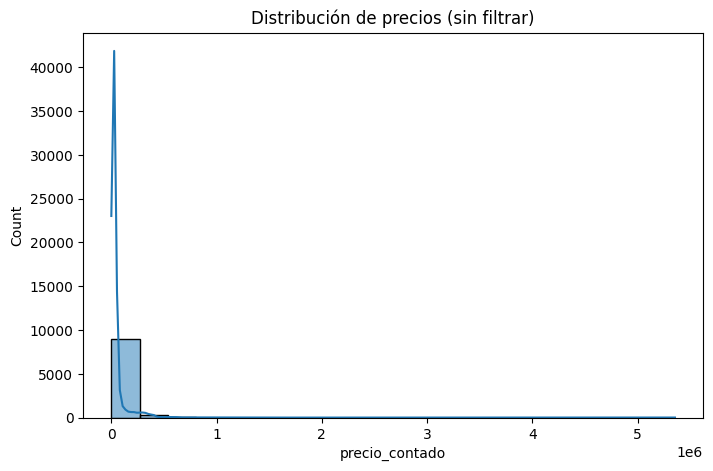

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df["precio_contado"], bins=20, kde=True)
plt.title("Distribución de precios (sin filtrar)")
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9249 entries, 0 to 9248
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   marca                           9249 non-null   object 
 1   modelo                          9249 non-null   object 
 2   precio_contado                  9249 non-null   float64
 3   financiacion_disponible         9249 non-null   int64  
 4   descuento                       9249 non-null   float64
 5   precio_final                    9249 non-null   float64
 6   ubicacion                       9249 non-null   object 
 7   kilometraje                     9249 non-null   float64
 8   combustible_Diésel              9249 non-null   bool   
 9   combustible_Eléctrico           9249 non-null   bool   
 10  combustible_Gas                 9249 non-null   bool   
 11  combustible_Gasolina            9249 non-null   bool   
 12  combustible_Híbrido             92

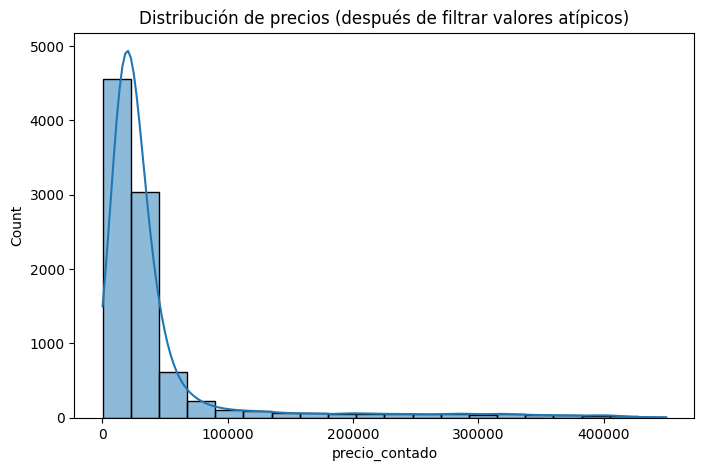

In [17]:
#Distribución de precios despues de eliminar los valores atipicos
plt.figure(figsize=(8,5))
sns.histplot(df_filtrado["precio_contado"], bins=20, kde=True)
plt.title("Distribución de precios (después de filtrar valores atípicos)")
plt.show()


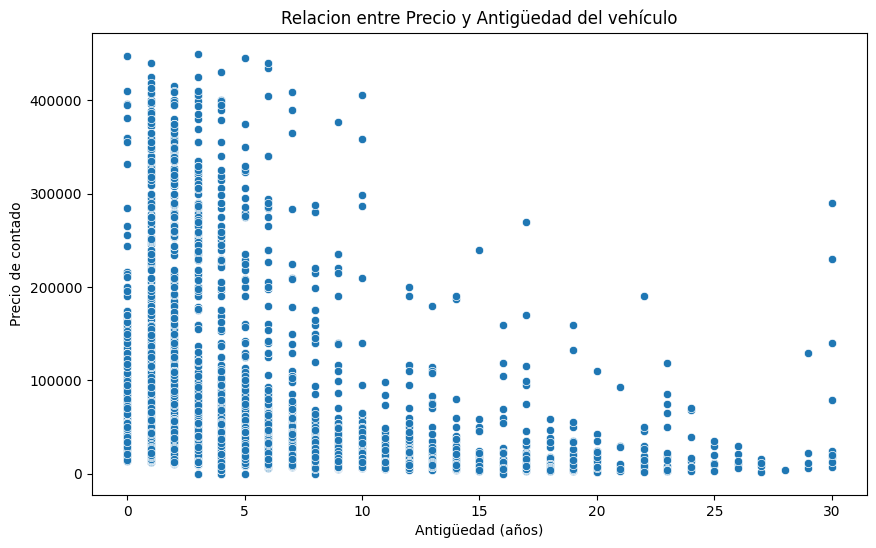

In [28]:
# Asegurarse de que la columna 'antiguedad' existe en df_filtrado
df_filtrado.loc[:, "antiguedad"] = 2025 - df_filtrado["año_matriculacion2"]

# Graficar precio/Antigüedad : mostrar si existe una relación entre el precio y la antigüedad del vehículo
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtrado, x="antiguedad", y="precio_contado")
plt.title("Relacion entre Precio y Antigüedad del vehículo")
plt.xlabel("Antigüedad (años)")
plt.ylabel("Precio de contado")
plt.show()


In [ ]:
#Coeficiente de Correlacion de Pearson
correlacion = df_filtrado[["antiguedad", "precio_contado"]].corr()
print(correlacion)

                antiguedad  precio_contado
antiguedad        1.000000       -0.213382
precio_contado   -0.213382        1.000000


In [27]:
df["garantia_limpia"]

0       24
1       24
2       24
3       24
4       36
        ..
9244    12
9245    12
9246    12
9247    12
9248    12
Name: garantia_limpia, Length: 9249, dtype: int64

(0.0, 500000.0)

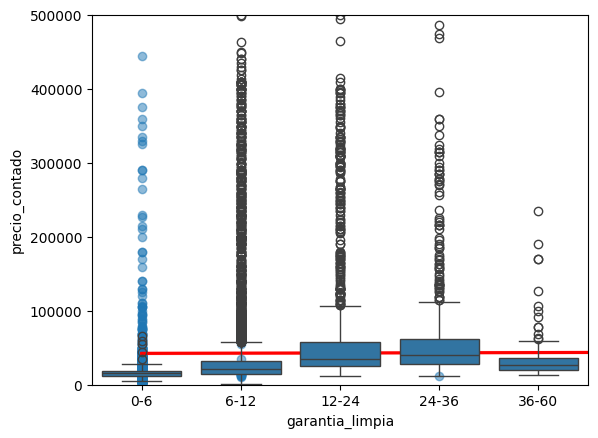

In [25]:
#boxplot agrupados 

# Gráfico de dispersión con regresión lineal
sns.regplot(x=df["garantia_limpia"], y=df["precio_contado"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
df["garantia_rango"] = pd.cut(df["garantia_limpia"], bins=[0, 6, 12, 24, 36, 60], labels=["0-6", "6-12", "12-24", "24-36", "36-60"])
sns.boxplot(x=df["garantia_rango"], y=df["precio_contado"])

plt.ylim(0, 500000)

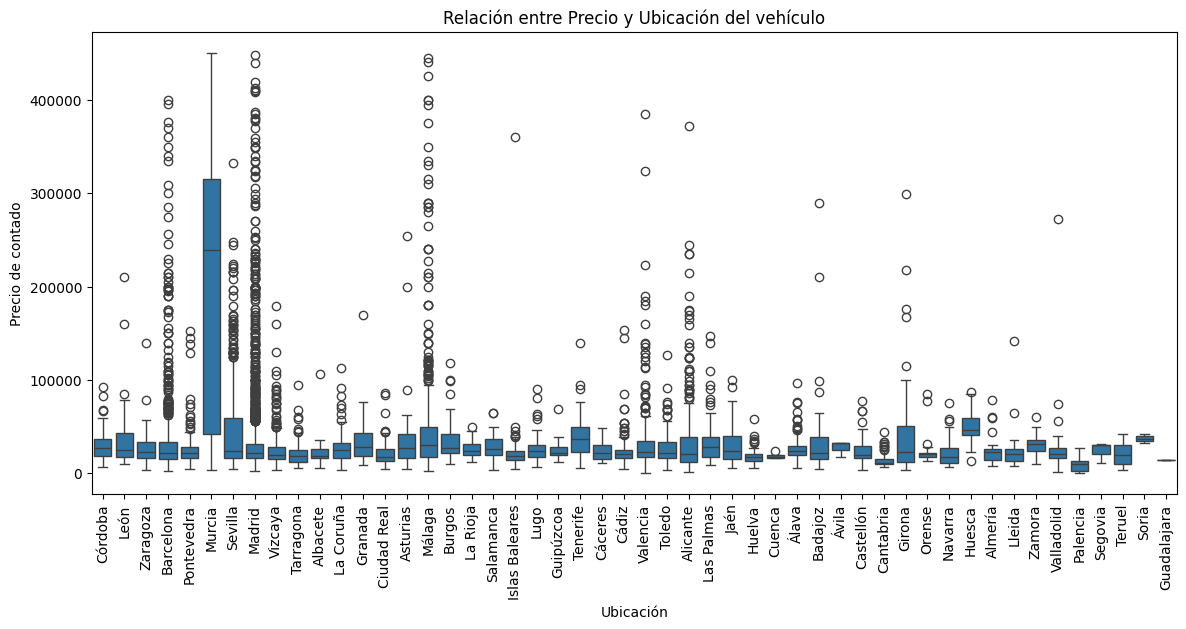

In [31]:
# Graficar precio /Ubicacion : mostrar si existe una relacion entre el precio y la ubicación del vehículo, segmentando por ubiacacion
plt.figure(figsize=(14,6))
sns.boxplot(data=df_filtrado, x="ubicacion", y="precio_contado")
plt.title("Relación entre Precio y Ubicación del vehículo")
plt.xlabel("Ubicación")
plt.ylabel("Precio de contado")
plt.xticks(rotation=90)
plt.show()


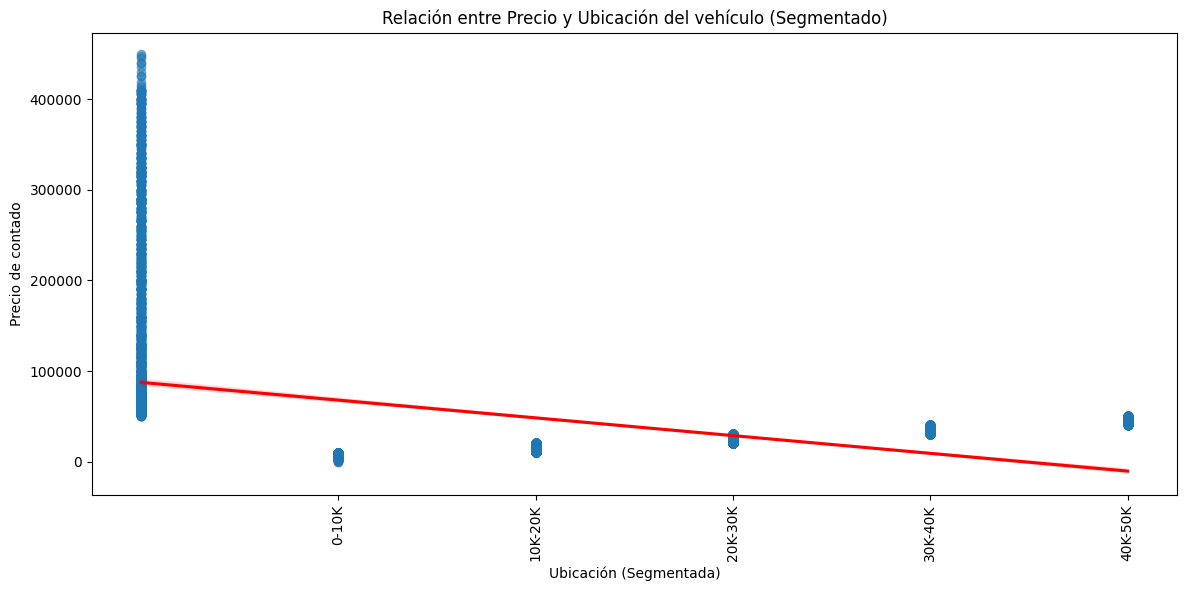

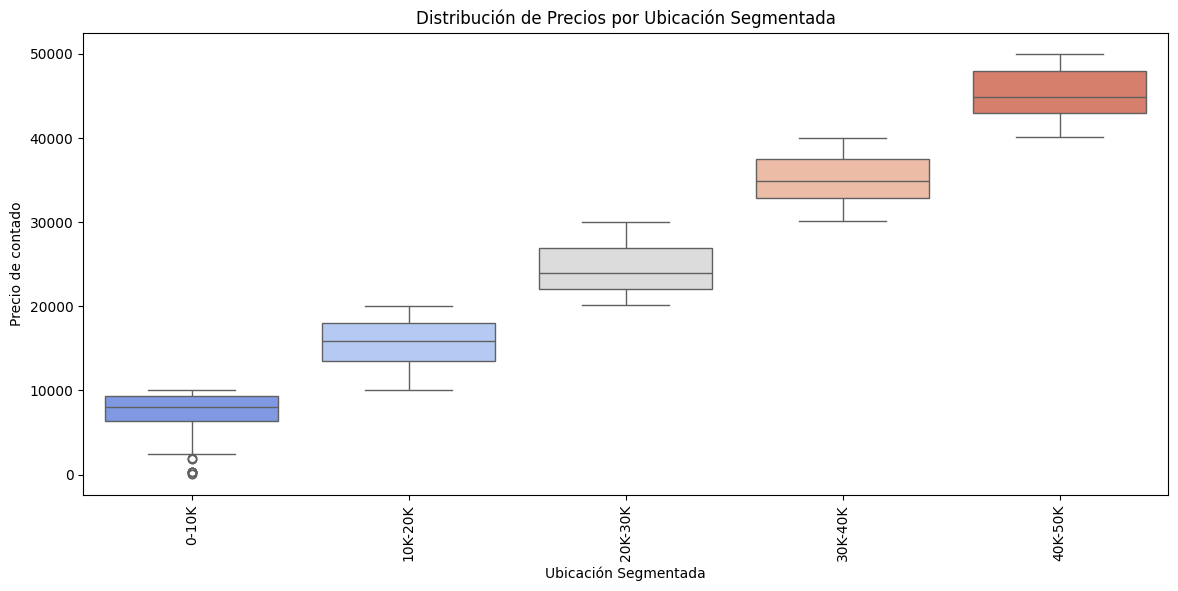

In [47]:
# Crear una nueva variable con agrupación por regiones (ajústalo según la estructura de tu dataset)
df_filtrado.loc[:, "ubicacion_rango"] = pd.cut(df_filtrado["precio_contado"], bins=[0, 10000, 20000, 30000, 40000, 50000], 
                                               labels=["0-10K", "10K-20K", "20K-30K", "30K-40K", "40K-50K"])

# Gráfico de dispersión con regresión lineal
plt.figure(figsize=(14,6))
sns.regplot(x=df_filtrado["ubicacion_rango"].cat.codes, y=df_filtrado["precio_contado"], 
            scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.xlabel("Ubicación (Segmentada)")
plt.ylabel("Precio de contado")
plt.title("Relación entre Precio y Ubicación del vehículo (Segmentado)")
plt.xticks(ticks=range(len(df_filtrado["ubicacion_rango"].cat.categories)), 
           labels=df_filtrado["ubicacion_rango"].cat.categories, rotation=90)
plt.show()

# Gráfico de cajas para analizar distribución de precios por ubicación agrupada
plt.figure(figsize=(14,6))
sns.boxplot(x=df_filtrado["ubicacion_rango"], y=df_filtrado["precio_contado"], hue=df_filtrado["ubicacion_rango"], palette="coolwarm", legend=False)

plt.title("Distribución de Precios por Ubicación Segmentada")
plt.xlabel("Ubicación Segmentada")
plt.ylabel("Precio de contado")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Graficar un mapa coropletico de precios por ubicacion


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9249 entries, 0 to 9248
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   marca                           9249 non-null   object  
 1   modelo                          9249 non-null   object  
 2   precio_contado                  9249 non-null   float64 
 3   financiacion_disponible         9249 non-null   int64   
 4   descuento                       9249 non-null   float64 
 5   precio_final                    9249 non-null   float64 
 6   ubicacion                       9249 non-null   object  
 7   kilometraje                     9249 non-null   float64 
 8   combustible_Diésel              9249 non-null   bool    
 9   combustible_Eléctrico           9249 non-null   bool    
 10  combustible_Gas                 9249 non-null   bool    
 11  combustible_Gasolina            9249 non-null   bool    
 12  combustible_Híbrido 

In [ ]:
# Cargar mapa español
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")